In [6]:
from langgraph.graph import StateGraph, END, START
from typing import TypedDict, Literal

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import os
import math

In [9]:
class Quadratic_State(TypedDict):
    a:int
    b:int
    c:int

    equation:str
    discriminant:float
    result:str
    plot_path:str 

    
def show_equation(state: Quadratic_State) -> Quadratic_State:
    eqn = f"{state['a']}x² + {state['b']}x + {state['c']}".replace("+ -", "- ")
    return {'equation':eqn}
    
def calculate_discriminant(state: Quadratic_State) -> Quadratic_State:
    discriminant = state['b']**2- 4*state['a']*state['c']
    return {'discriminant':discriminant}

def real_roots(state: Quadratic_State) -> Quadratic_State:
    root1 = (-state['b'] + state['discriminant']**0.5)/(2*state['a'])
    root2 = (-state['b'] - state['discriminant']**0.5)/(2*state['a'])
    result = f"The roots are :{root1} , {root2}"
    return {'result':result}

def equal_roots(state: Quadratic_State) -> Quadratic_State:
    root1 = (-state['b'] + state['discriminant']**0.5)/(2*state['a'])
    root2 = (-state['b'] - state['discriminant']**0.5)/(2*state['a'])
    result = f"The roots are :{root1} , {root2}"
    return {'result':result}

def imaginary_roots(state: Quadratic_State) -> Quadratic_State:
    root1 = (-state['b'] + state['discriminant']**0.5)/(2*state['a'])
    root2 = (-state['b'] - state['discriminant']**0.5)/(2*state['a'])
    result = f"The roots are :{root1} , {root2}"
    return {'result':result}

def check_condition(state:Quadratic_State)-> Literal['real_roots','equal_roots','imaginary_roots']:
    if state['discriminant']>0:
        return "real_roots"
    elif state['discriminant']==0:
        return "equal_roots"
    else:
        return "imaginary_roots"
    
def plot_curve(state: Quadratic_State) -> Quadratic_State:
    a, b, c = state["a"], state["b"], state["c"]
    d = state["discriminant"]

    # x-range around vertex for nicer view
    x0 = -b / (2 * a) if a != 0 else 0
    x = np.linspace(x0 - 10, x0 + 10, 400)
    y = a*(x**2) + b*x + c

    plt.figure(figsize=(5, 4))  # width x height in inches
    plt.plot(x, y)
    plt.axhline(0, linewidth=1)
    plt.axvline(0, linewidth=1)
    plt.grid(True)

    # Title
    plt.title(state.get("equation", f"{a}x² + {b}x + {c}"))
    plt.xlabel("x")
    plt.ylabel("y")

    # ✅ mark roots in red (only if real)
    if a != 0 and d >= 0:
        sqrt_d = math.sqrt(d)
        r1 = (-b + sqrt_d) / (2 * a)
        r2 = (-b - sqrt_d) / (2 * a)

        if abs(r1 - r2) < 1e-12:
            # equal root
            plt.scatter([r1], [0], s=80, marker="o", c="red", label="Root")
        else:
            # two roots
            plt.scatter([r1, r2], [0, 0], s=80, marker="o", c="red", label="Roots")

        plt.legend()

    os.makedirs("outputs", exist_ok=True)
    plot_path = os.path.join("outputs", "quadratic_plot.png")
    plt.savefig(plot_path, bbox_inches="tight")
    plt.show()

    return {"plot_path": plot_path}


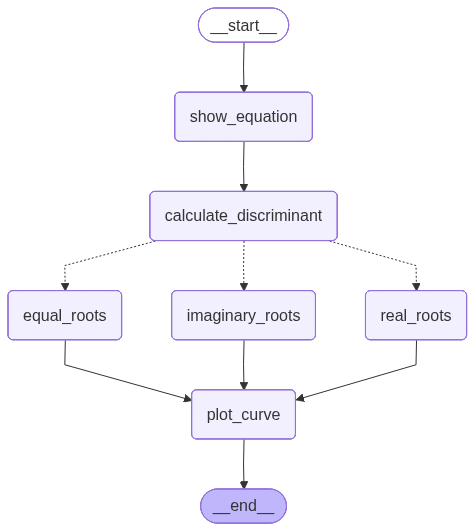

In [10]:
graph = StateGraph(Quadratic_State)

## add node
graph.add_node('show_equation',show_equation)
graph.add_node('calculate_discriminant',calculate_discriminant)
graph.add_node('real_roots',real_roots)
graph.add_node('equal_roots',equal_roots)
graph.add_node('imaginary_roots',imaginary_roots)
graph.add_node('plot_curve',plot_curve)

## add edges
graph.add_edge(START,'show_equation')
graph.add_edge('show_equation','calculate_discriminant')

graph.add_conditional_edges('calculate_discriminant',check_condition)
graph.add_edge('real_roots','plot_curve')
graph.add_edge('equal_roots','plot_curve')
graph.add_edge('imaginary_roots','plot_curve')

graph.add_edge('plot_curve',END)

## workflow
workflow = graph.compile()

workflow

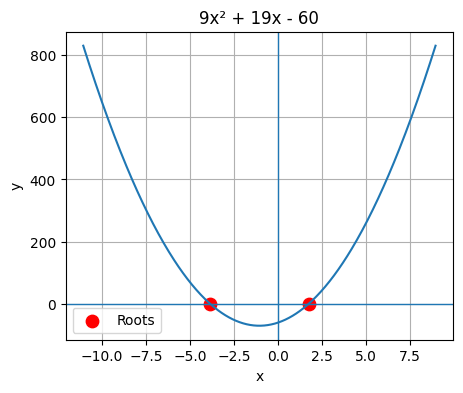

{'a': 9,
 'b': 19,
 'c': -60,
 'equation': '9x² + 19x - 60',
 'discriminant': 2521,
 'result': 'The roots are :1.7338644912518204 , -3.8449756023629313',
 'plot_path': 'outputs\\quadratic_plot.png'}

In [21]:
initial_state = {
    'a': 9,
    'b': 19,
    'c': -60
}

final_state = workflow.invoke(initial_state)

final_state